In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from datetime import datetime
import pandas as pd
from itertools import product

In [2]:
with open("/project/ls-gruen/ligodesi/work/S240615dg/catalogs/sexall.sh",'w') as f:
    images = glob.glob("/project/ls-gruen/ligodesi/work/S240615dg/final/S*[124].fits")
    for image in images:
        print("/project/ls-gruen/ligodesi/scripts/script_sex.sh ",image," 10 Y AUTO 2.0",file=f)

In [29]:
cats = glob.glob("/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S*[24].cat")
for cat in cats:
    print(cat)

/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat
/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240718_r_2.cat
/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240618_r_2.cat
/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240720_r_2.cat
/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240624_r_2.cat
/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240628_r_2.cat


In [30]:
cats.remove('/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240718_r_2.cat')
cats.remove('/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240624_r_2.cat')
cats.remove('/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240720_r_2.cat')
cats

['/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat',
 '/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240618_r_2.cat',
 '/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240628_r_2.cat']

## Lightcurves

In [25]:
def convert(pos):

    RA,Dec=pos.split()
    
    hms=[float(i) for i in RA.split(':')]
    ra= 15*(hms[0]+hms[1]/60+hms[2]/3600)

    dms=[float(i) for i in Dec.split(':')]
    if dms[0]>0:
        dec= dms[0]+dms[1]/60+dms[2]/3600
    else:
        dec = dms[0]-(float(dms[1])/60)-(float(dms[2])/3600)
    return ra,dec

convert('00:30:59.5506 +45:19:59.641')

(7.748127500000001, 45.33323361111111)

00:30:59.5506 +45:19:59.641

In [26]:
def get_phot(pos):
    
    ra,dec=convert(pos)
    measurements=[]
    
    for cat in cats:
        print(cat)
        
        t = np.genfromtxt(cat)
        ALPHA=1
        DELTA=2
        MAG_AUTO=26
        MAGERR_AUTO=27
        
        d2 = ((t[:,ALPHA]-ra)*np.cos(np.deg2rad(t[:,DELTA])))**2+(t[:,DELTA]-dec)**2 # distance squared in sq deg
        match ,= np.where(d2<(1/3600.)**2)
        print(len(match))
        
        if(len(match)==1):
            measurements.append([t[match,ALPHA][0], t[match,DELTA][0], t[match,MAG_AUTO][0], t[match,MAGERR_AUTO][0]])
            
        if(len(match)>1):
            
            print("multiple matches in", cat)
            
    return np.array(measurements)

In [27]:
measurements=get_phot('00:30:59.5506 +45:19:59.641')
measurements

/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat
1
/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240718_r_2.cat
1
/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240618_r_2.cat
1
/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240720_r_2.cat
1
/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240628_r_2.cat
1


array([[ 7.74790510e+00,  4.53330218e+01, -1.10112000e+01,
         7.10000000e-03],
       [ 7.74793180e+00,  4.53330152e+01, -1.10271000e+01,
         9.30000000e-03],
       [ 7.74794100e+00,  4.53330388e+01, -1.13382000e+01,
         1.52000000e-02],
       [ 7.74793790e+00,  4.53330227e+01, -1.09793000e+01,
         1.36000000e-02],
       [ 7.74794110e+00,  4.53330358e+01, -1.12083000e+01,
         1.80000000e-02]])

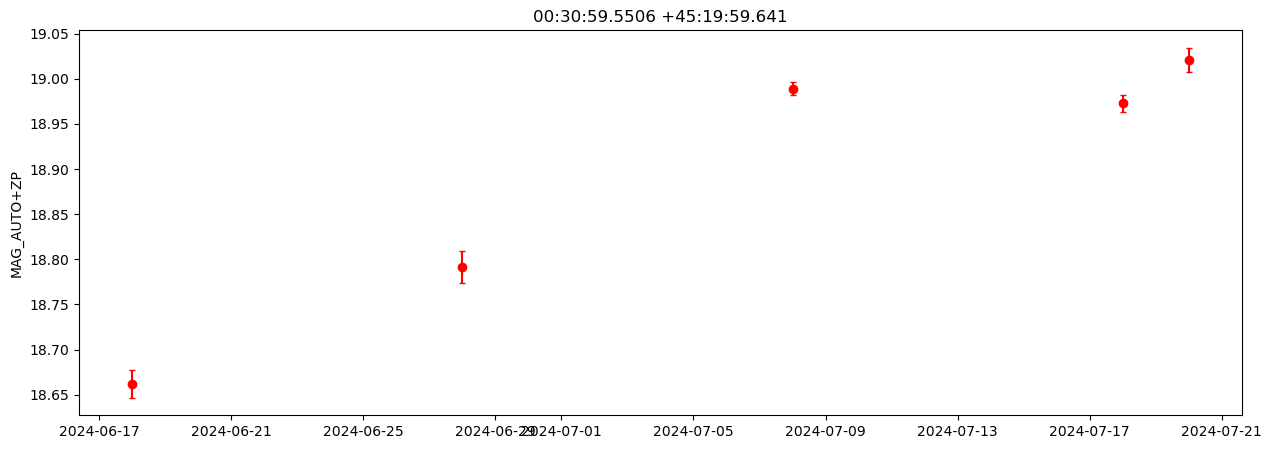

In [28]:
mags=measurements[:,2]
errs=measurements[:,3]
dates=['240708','240718','240618','240720','240628']

def lightcurve(pos,mags,errs):
    
    xs=[datetime.fromisoformat('20'+date) for date in dates]
    
    plt.figure(figsize=(15,5))
    plt.errorbar(xs,mags+30,errs,fmt='o',color='red',capsize=2)
    plt.ylabel('MAG_AUTO+ZP')
    plt.title(pos)
    
lightcurve('00:30:59.5506 +45:19:59.641',mags,errs)

## X-Ray Counterparts

In [13]:
def hms2deg(string):
    
    h=float(string[0:2])
    m=float(string[4:6])
    s=float(string[8:13])
    
    return 15*(h+m/60+s/3600)

def dms2deg(string):
    
    d=float(string[1:3])
    m=float(string[5:7])
    s=float(string[9:])
    
    return (d+m/60+s/3600)

In [14]:
source_ids = [
    "S240615dg_X40", "S240615dg_X41", "S240615dg_X42", "S240615dg_X43", "S240615dg_X44", 
    "S240615dg_X46", "S240615dg_X47", "S240615dg_X48", "S240615dg_X49", "S240615dg_X50", 
    "S240615dg_X51", "S240615dg_X56", "S240615dg_X58", "S240615dg_X59", "S240615dg_X60", 
    "S240615dg_X61", "S240615dg_X62", "S240615dg_X63", "S240615dg_X64", "S240615dg_X65", 
    "S240615dg_X66", "S240615dg_X67", "S240615dg_X68", "S240615dg_X69", "S240615dg_X70", 
    "S240615dg_X71", "S240615dg_X72"
]

ra = [
    "00h 29m 11.77s", "00h 35m 07.98s", "00h 29m 37.71s", "00h 27m 15.43s", "00h 35m 13.49s", 
    "00h 25m 16.37s", "00h 28m 17.21s", "00h 31m 20.40s", "00h 35m 35.80s", "00h 35m 29.05s", 
    "00h 25m 53.05s", "00h 25m 53.56s", "00h 31m 05.12s", "00h 31m 08.24s", "00h 35m 42.54s", 
    "00h 29m 30.69s", "00h 27m 01.17s", "00h 29m 41.77s", "00h 28m 43.62s", "00h 29m 28.36s", 
    "00h 33m 53.13s", "00h 33m 32.16s", "00h 25m 25.85s", "00h 32m 33.84s", "00h 28m 46.16s", 
    "00h 28m 30.50s", "00h 28m 09.61s"
]

err90 = [
    7.0, 5.7, 6.1, 8.1, 5.7, 9.4, 8.5, 9.7, 6.2, 41.5, 7.9, 8.9, 13.3, 8.1, 5.7, 8.2, 7.2, 8.2, 5.6, 
    41.8, 7.7, 8.0, 5.9, 8.6, 8.3, 6.2, 7.4
]

dec = [
    "+46d 23' 08.6", "+46d 06' 59.0", "+45d 16' 24.8", "+46d 12' 40.0", "+46d 06' 05.6", 
    "+45d 52' 02.5", "+44d 57' 16.8", "+46d 49' 39.9", "+46d 23' 49.6", "+46d 08' 42.8", 
    "+45d 34' 29.8", "+45d 29' 48.7", "+46d 33' 25.6", "+46d 32' 10.8", "+45d 48' 05.6", 
    "+46d 40' 25.7", "+46d 30' 12.4", "+46d 37' 51.5", "+45d 01' 49.1", "+46d 42' 15.1", 
    "+46d 45' 28.6", "+46d 08' 32.0", "+45d 33' 41.3", "+46d 47' 32.5", "+46d 05' 15.6", 
    "+46d 19' 12.1", "+46d 18' 20.6"
]

In [31]:
objects = {
    source_ids[i]: (hms2deg(ra[i]),dms2deg(dec[i]),err90[i]) for i in range(len(source_ids))
}

objects

{'S240615dg_X40': (7.299041666666667, 46.38572222222222, 7.0),
 'S240615dg_X41': (8.78325, 46.11638888888889, 5.7),
 'S240615dg_X42': (7.407125000000001, 45.273555555555554, 6.1),
 'S240615dg_X43': (6.814291666666667, 46.211111111111116, 8.1),
 'S240615dg_X44': (8.806208333333334, 46.10155555555556, 5.7),
 'S240615dg_X46': (6.318208333333334, 45.86736111111111, 9.4),
 'S240615dg_X47': (7.0717083333333335, 44.95466666666667, 8.5),
 'S240615dg_X48': (7.835000000000002, 46.82775, 9.7),
 'S240615dg_X49': (8.899166666666666, 46.39711111111111, 6.2),
 'S240615dg_X50': (8.871041666666667, 46.14522222222222, 41.5),
 'S240615dg_X51': (6.471041666666667, 45.57494444444445, 7.9),
 'S240615dg_X56': (6.473166666666667, 45.49686111111111, 8.9),
 'S240615dg_X58': (7.771333333333334, 46.557111111111105, 13.3),
 'S240615dg_X59': (7.784333333333334, 46.53633333333333, 8.1),
 'S240615dg_X60': (8.92725, 45.80155555555555, 5.7),
 'S240615dg_X61': (7.377875, 46.67380555555555, 8.2),
 'S240615dg_X62': (6.754

In [32]:
allmeasurements = {}
multiples={}

#Get SExtracted sources within 90% error region match of each counterpart

for cat in cats:
    t = np.genfromtxt(cat)
    ALPHA=1
    DELTA=2
    MAG_APER=5
    MAGERR_APER=6
    MAG_AUTO=26
    MAGERR_AUTO=27
    
    measurements = {}
    mult={}
    print(cat)
    
    for o in objects:
        
        d2 = ((t[:,ALPHA]-objects[o][0])*np.cos(np.deg2rad(t[:,DELTA])))**2+(t[:,DELTA]-objects[o][1])**2 # distance squared in sq deg
        match ,= np.where(d2<(objects[o][2]/3600.)**2) # 90% error region match
        print(len(match))
        
        if(len(match)==1):
            measurements[o] = [t[match,ALPHA][0], t[match,DELTA][0], t[match,MAG_AUTO][0], t[match,MAGERR_AUTO][0], t[match,MAG_APER][0], t[match,MAGERR_APER][0]]
            
        if(len(match)>1):
            
            print("multiple matches for", o, "in", cat)
            mult[o]=[]
            measurements[o]=[]
            
            for i in range(len(match)):
                 
                mult[o].append(np.array([t[match[i],ALPHA], t[match[i],DELTA], t[match[i],MAG_AUTO], 
                         t[match[i],MAGERR_AUTO], t[match[i],MAG_APER], t[match[i],MAGERR_APER]]))
                measurements[o].append(np.array([t[match[i],ALPHA], t[match[i],DELTA], t[match[i],MAG_AUTO], 
                         t[match[i],MAGERR_AUTO], t[match[i],MAG_APER], t[match[i],MAGERR_APER]]))
                
                
            measurements[o]=np.array(measurements[o])
                
    multiples[cat]=mult                
    allmeasurements[cat] = measurements

/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat
1
0
1
0
0
2
multiple matches for S240615dg_X46 in /project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat
0
0
0
0
0
1
7
multiple matches for S240615dg_X58 in /project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat
2
multiple matches for S240615dg_X59 in /project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat
0
0
2
multiple matches for S240615dg_X62 in /project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat
1
0
32
multiple matches for S240615dg_X65 in /project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat
0
0
2
multiple matches for S240615dg_X68 in /project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat
0
2
multiple matches for S240615dg_X70 in /project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat
2
multiple matches for S240615dg_X71 in /project/ls-gruen/ligodesi/

In [33]:
allmeasurements

{'/project/ls-gruen/ligodesi/work/S240615dg/catalogs/S240615dg_V240708_r_2.cat': {'S240615dg_X40': [7.2981187,
   46.3848294,
   -7.8664,
   0.0451,
   -7.5657,
   0.0361],
  'S240615dg_X42': [7.4061695, 45.2723904, -10.6311, 0.0082, -8.5733, 0.0126],
  'S240615dg_X46': array([[ 6.3213475, 45.867793 , -5.9005   ,  0.1976   , -6.3276   ,
           0.1616   ],
         [ 6.3185348, 45.8675215, -7.4367   ,  0.0674   , -7.3429   ,
           0.0652   ]]),
  'S240615dg_X56': [6.4736449, 45.4979947, -5.3058, 0.2473, -0.5845, 29.4409],
  'S240615dg_X58': array([[ 7.76651490e+00,  4.65555390e+01, -1.38128000e+01,
           8.00000000e-04, -1.35654000e+01,  8.00000000e-04],
         [ 7.77463980e+00,  4.65542099e+01, -5.87870000e+00,
           1.90100000e-01, -5.48090000e+00,  3.02900000e-01],
         [ 7.77462930e+00,  4.65555615e+01, -6.19090000e+00,
           1.50100000e-01, -6.12180000e+00,  1.29400000e-01],
         [ 7.77466330e+00,  4.65563085e+01, -6.74290000e+00,
           1.4450

In [ ]:
#Only sources detected on all 3 days are kept 

detections=[list(allmeasurements[i].keys()) for i in list(allmeasurements.keys())]
#common=np.union1d(np.union1d(np.intersect1d(detections[0],detections[1]),np.intersect1d(detections[0],detections[2])),np.intersect1d(detections[1],detections[2]))
common=np.intersect1d(np.intersect1d(detections[0],detections[1]),np.intersect1d(detections[1],detections[2]))
common    

In [35]:
def dist(ra1,dec1,ra2,dec2):
    
    return np.sqrt(((ra1-ra2)*np.cos(np.deg2rad(dec1)))**2+(dec1-dec2)**2)*3600

In [38]:
def get_all_sources(x):
    
    data=[allmeasurements[cats[i]][x] for i in range(3)]

    data=[np.array(data[i]).reshape(1, 6) if np.array(data[i]).shape == (6,) else np.array(data[i]) for i in range(3)]
    d1,d2,d3=data 
        
    filt=np.zeros((d1.shape[0],d2.shape[0],d3.shape[0]))
    print(filt.shape)
    
    for i in range(len(d1)):
        
        for j in range(len(d2)):
            
            for k in range(len(d3)):
            
                angsep1=dist(d1[i][0],d1[i][1],d2[j][0],d2[j][1])
                angsep2=dist(d1[i][0],d1[i][1],d3[k][0],d3[k][1])
                angsep3=dist(d2[j][0],d2[j][1],d3[k][0],d3[k][1])

                if ((angsep1<1) and (angsep2<1) and (angsep3<1)):
                   
                   filt[i][j][k]=angsep1+angsep2+angsep3
    
    print(filt)
    print(np.array(np.nonzero(filt)).T)
    
    return filt, np.array(np.nonzero(filt)).T

In [39]:
filters=[]
good_obj=[]

for k in common:
    print(k)
    filt, good= get_all_sources(k)
    filters.append(filt)
    good_obj.append(good)

S240615dg_X40
(1, 1, 1)
[[[0.56726544]]]
[[0 0 0]]
S240615dg_X42
(1, 6, 12)
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.55188156]]]
[[ 0  5 11]]
S240615dg_X58
(7, 2, 4)
[[[0.02316764 0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 

In [25]:
good_obj

[array([[0, 0, 0]]),
 array([[ 0,  5, 11]]),
 array([[0, 0, 0],
        [5, 1, 1]]),
 array([], shape=(0, 3), dtype=int64),
 array([[ 0,  0,  0],
        [ 1,  1,  1],
        [ 9,  2, 15],
        [10, 15,  2],
        [21, 14, 11],
        [23,  6, 10],
        [25, 12, 14],
        [27,  8,  3],
        [29, 16,  7]]),
 array([[0, 1, 4],
        [1, 0, 3]]),
 array([[1, 0, 0]]),
 array([[0, 0, 0]])]

In [41]:
final={}
keys=list(allmeasurements.keys())

for i in range(len(common)):
    
    final[common[i]]=[[] for t in range(len(good_obj[i]))]
    
    for t in range(len(good_obj[i])):
        
        for q in range(3):          
            
            on_q=good_obj[i][t][q]
            dat=np.array(allmeasurements[keys[q]][common[i]])
            
            if dat.shape==(6,):
                dat=dat.reshape(1,6)

            final[common[i]][t].append(dat[on_q])   

In [42]:
final

{'S240615dg_X40': [[array([ 7.29811870e+00,  4.63848294e+01, -7.86640000e+00,  4.51000000e-02,
          -7.56570000e+00,  3.61000000e-02]),
   array([ 7.2981477, 46.3847929, -8.311    ,  0.123    , -7.5596   ,
           0.0865   ]),
   array([ 7.2981397, 46.3848677, -7.9488   ,  0.1231   , -7.224    ,
           0.123    ])]],
 'S240615dg_X42': [[array([ 7.40616950e+00,  4.52723904e+01, -1.06311000e+01,  8.20000000e-03,
          -8.57330000e+00,  1.26000000e-02]),
   array([ 7.40608470e+00,  4.52723899e+01, -1.09486000e+01,  2.29000000e-02,
          -8.89740000e+00,  3.22000000e-02]),
   array([ 7.40618040e+00,  4.52723687e+01, -1.07267000e+01,  2.14000000e-02,
          -8.83480000e+00,  3.40000000e-02])]],
 'S240615dg_X58': [[array([ 7.7665149e+00,  4.6555539e+01, -1.3812800e+01,  8.0000000e-04,
          -1.3565400e+01,  8.0000000e-04]),
   array([ 7.76651550e+00,  4.65555414e+01, -1.41991000e+01,  1.70000000e-03,
          -1.34694000e+01,  1.70000000e-03]),
   array([ 7.766513

7.2981187 46.3847929


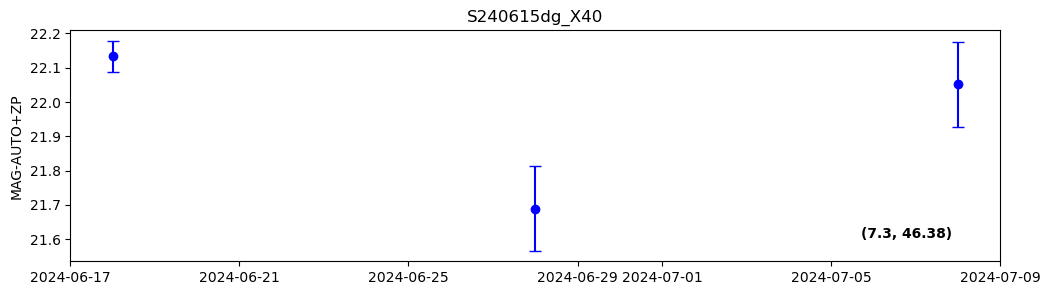

7.4061695 45.2723899


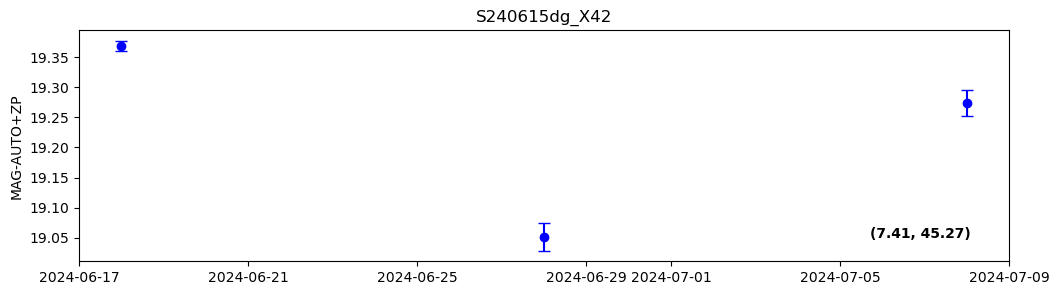

7.7665149 46.5555414


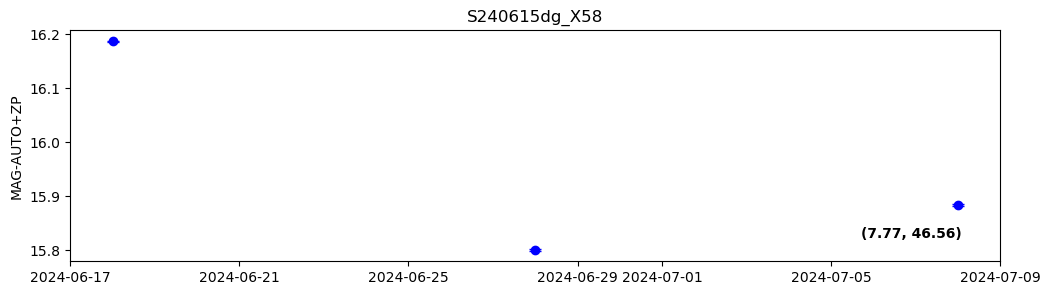

7.775191 46.5559472


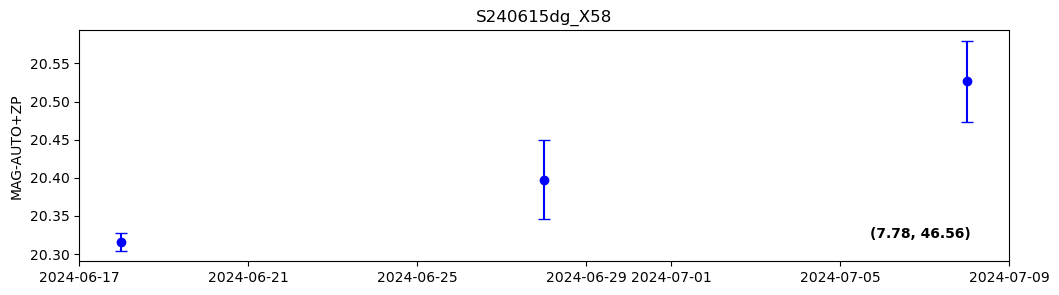

7.3747374 46.6999527


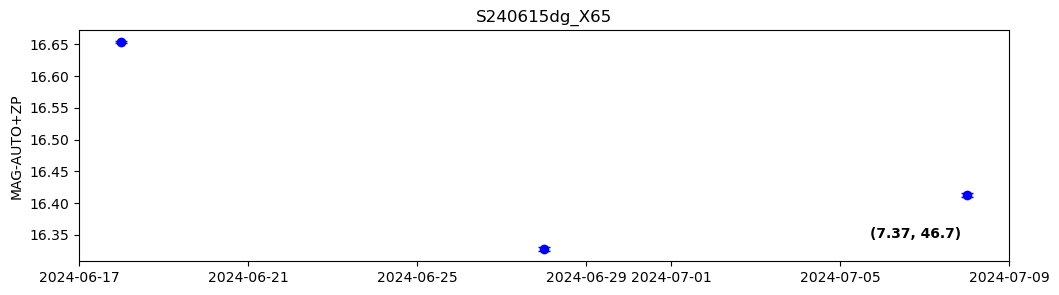

7.3571383 46.6962194


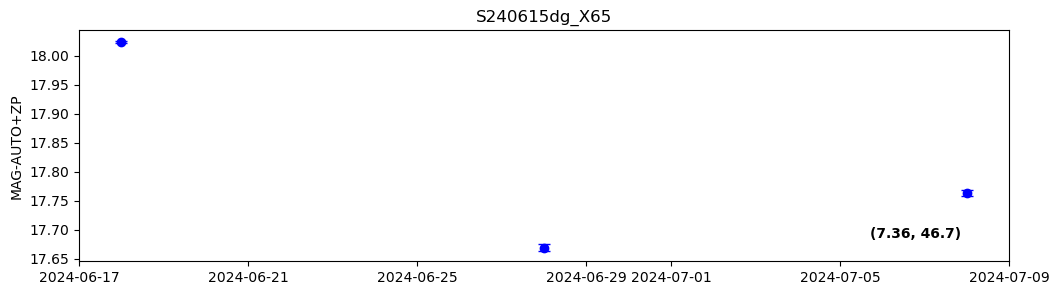

7.3661723 46.7110767


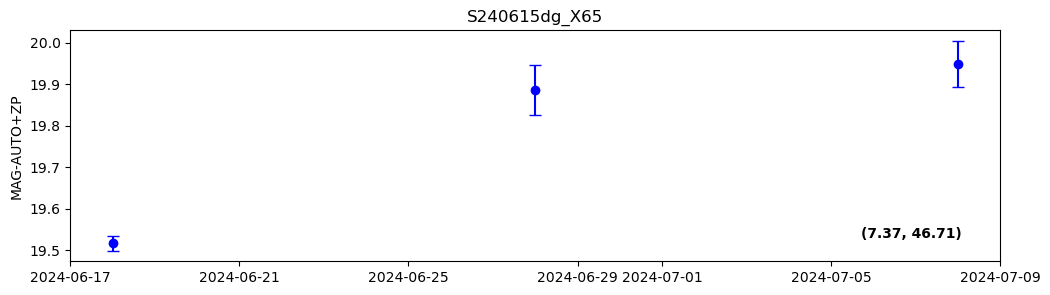

7.3564317 46.7086973


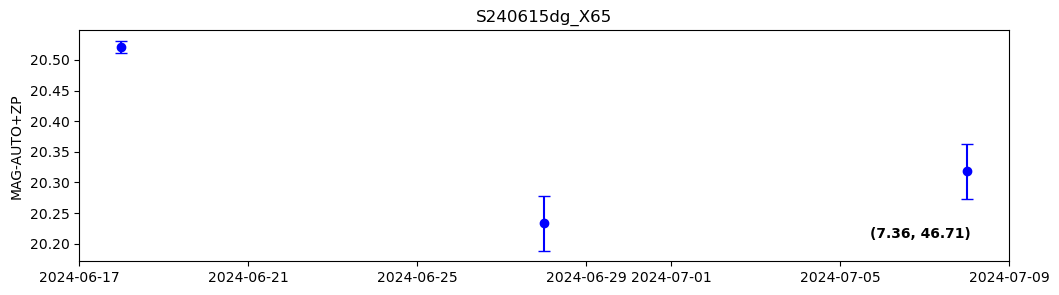

7.3849006 46.7050348


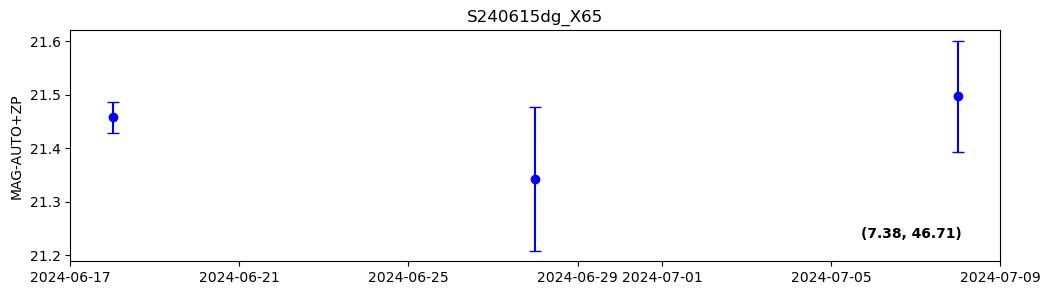

7.3544673 46.7059745


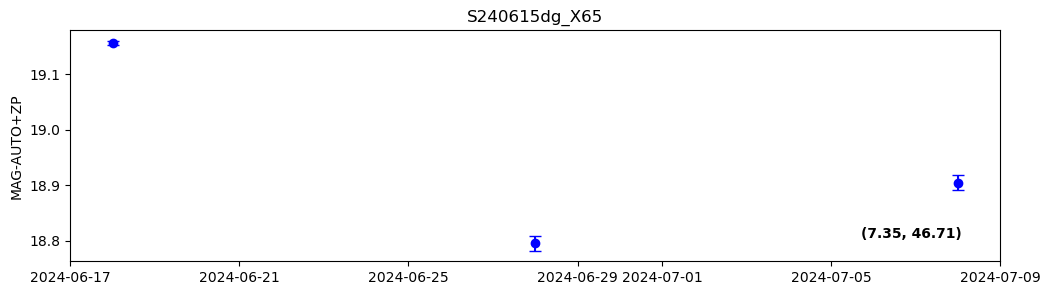

7.3818273 46.6975214


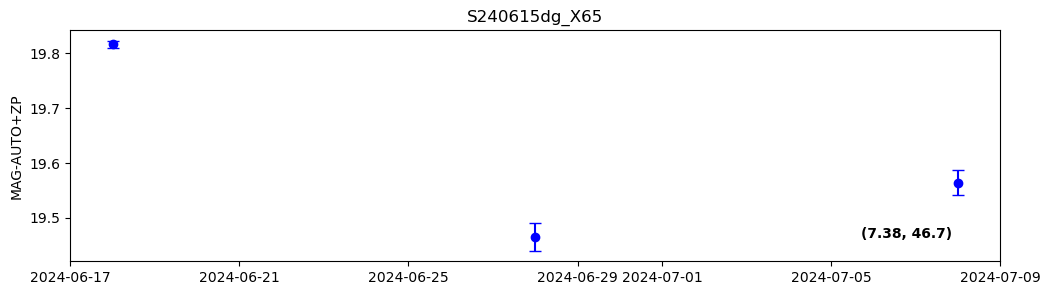

7.3706624 46.7010246


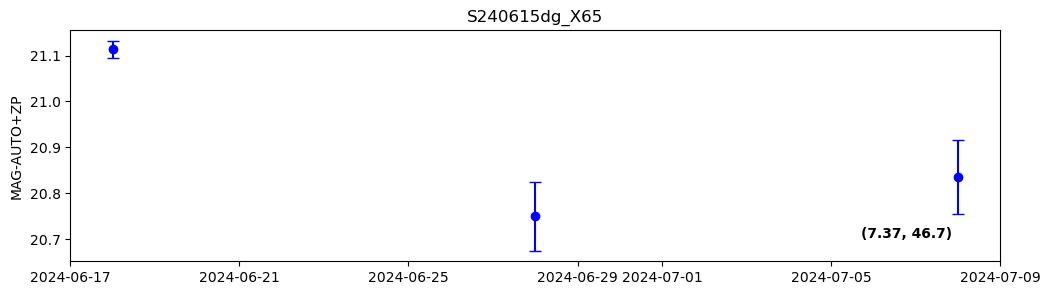

7.3646585 46.704508


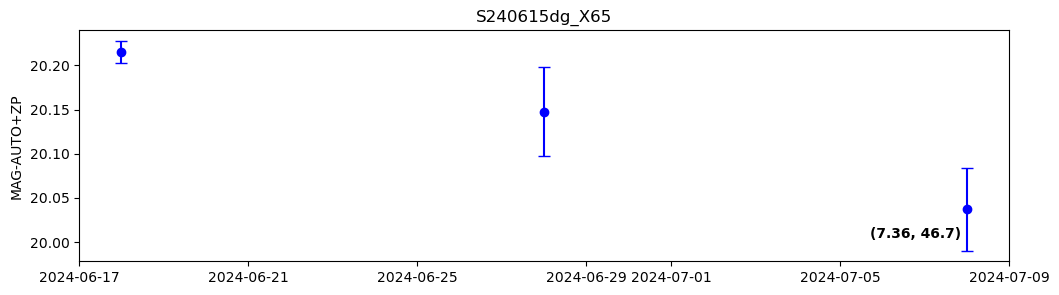

7.193917 46.0878291


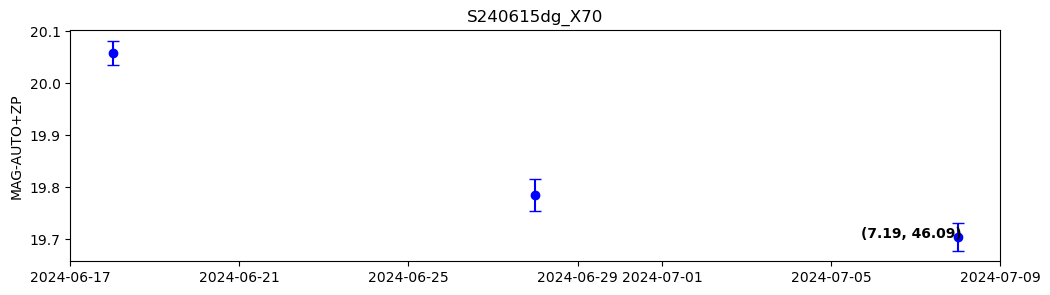

7.193244 46.0887053


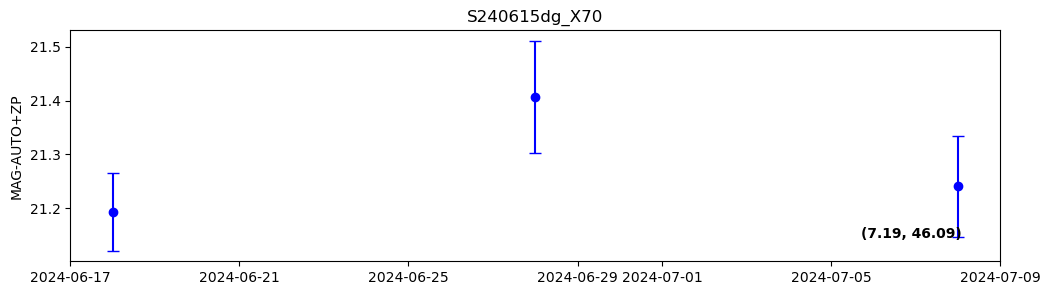

7.1259109 46.3197414


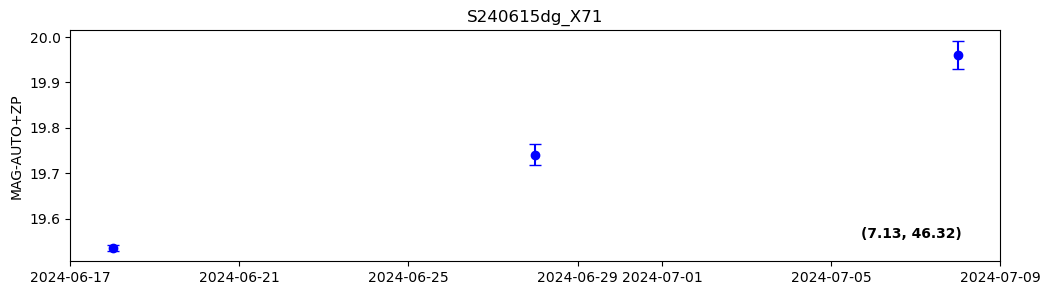

7.0400338 46.3069461


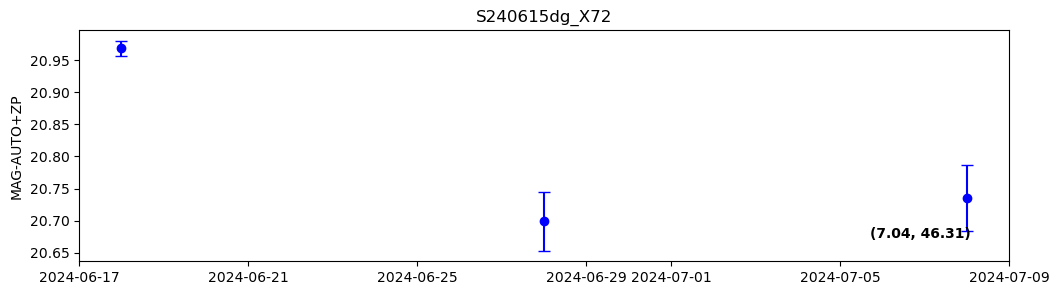

In [43]:
dates = ['240618', '240628', '240708']
sources=[]
ras=[]
decs=[]
flags=[]

def lc(src):
    
    for i in final[src]:
        
        i=np.array(i)
        mags=i[:,2]
        errs=np.abs(i[:,3])
        ra=i[:,0][0]
        dec=i[:,1][1]
        sources.append(src)
        ras.append(ra)
        print(ra,dec)
        flags.append(0)
        decs.append(dec)
        
        xs=[datetime.fromisoformat('20'+date) for date in dates]
    
        fig,ax=plt.subplots(figsize=(12,3))
        ax.text(0.85,0.1, '({ra}, {dec})'.format(ra=np.round(ra,2),dec=np.round(dec,2)),fontweight='bold',transform=ax.transAxes)
        ax.errorbar(xs,30+mags,errs,fmt='o',capsize=4,color='blue')
        ax.set_title(src)
        ax.set_ylabel('MAG-AUTO+ZP')
        plt.savefig('{src}:{ra}:{dec}.png'.format(src=src,ra=ra,dec=dec))
        plt.show()     
        
for i in common:
    lc(i)

In [29]:
df=pd.DataFrame({'Source':sources, 'RA':ras, 'Dec': decs, 'Flags': flags})
df

,Source,RA,Dec,Flags
0,S240615dg_X40,7.298119,46.384793,0
1,S240615dg_X42,7.406169,45.272390,0
2,S240615dg_X58,7.766515,46.555541,0
3,S240615dg_X58,7.775191,46.555947,0
4,S240615dg_X65,7.374737,46.699953,0
5,S240615dg_X65,7.357138,46.696219,0
6,S240615dg_X65,7.366172,46.711077,0
7,S240615dg_X65,7.356432,46.708697,0
8,S240615dg_X65,7.384901,46.705035,0
9,S240615dg_X65,7.354467,46.705975,0


In [30]:
[(df['RA'][i]/15, df['Dec'][i]) for i in range(17)]

[(0.48654124666666665, 46.3847929),
 (0.49374463333333335, 45.2723899),
 (0.51776766, 46.5555414),
 (0.5183460666666667, 46.5559472),
 (0.49164916, 46.6999527),
 (0.49047588666666664, 46.6962194),
 (0.4910781533333333, 46.7110767),
 (0.49042878, 46.7086973),
 (0.49232670666666667, 46.7050348),
 (0.49029782, 46.7059745),
 (0.49212182000000004, 46.6975214),
 (0.4913774933333333, 46.7010246),
 (0.4909772333333333, 46.704508),
 (0.47959446666666666, 46.0878291),
 (0.4795496, 46.0887053),
 (0.47506072666666666, 46.3197414),
 (0.46933558666666664, 46.3069461)]

In [31]:
lst=[1,2,3,4,5,7,9,10,11,12,13,15,16]

df['Flags'][lst]='STAR_FOUND'
df

/scratch-local/slurm-job-tmp-662366/ipykernel_233/836391566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Flags'][lst]='STAR_FOUND'
/scratch-local/slurm-job-tmp-662366/ipykernel_233/836391566.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'STAR_FOUND' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Flags'][lst]='STAR_FOUND'


,Source,RA,Dec,Flags
0,S240615dg_X40,7.298119,46.384793,0
1,S240615dg_X42,7.406169,45.272390,STAR_FOUND
2,S240615dg_X58,7.766515,46.555541,STAR_FOUND
3,S240615dg_X58,7.775191,46.555947,STAR_FOUND
4,S240615dg_X65,7.374737,46.699953,STAR_FOUND
5,S240615dg_X65,7.357138,46.696219,STAR_FOUND
6,S240615dg_X65,7.366172,46.711077,0
7,S240615dg_X65,7.356432,46.708697,STAR_FOUND
8,S240615dg_X65,7.384901,46.705035,0
9,S240615dg_X65,7.354467,46.705975,STAR_FOUND


In [32]:
df.to_csv('X-SExMatches.csv')

In [33]:
df2=pd.read_csv('S240615dg_bayestar_PQSO_0.99.ecsv')
df2

,RA,DEC,Z_TRUE,P_QSO,Z_FROM
0,7.179459,45.914646,0.271565,0.164112,1
1,7.013217,46.771072,0.337283,0.114719,1
2,8.962203,46.520341,0.333775,0.101133,1
3,4.807896,45.439253,0.262181,0.072636,1
4,4.601519,45.482237,0.257803,0.058420,1
...,...,...,...,...,...
66,6.245076,47.518229,0.588850,0.000170,1
67,7.440210,48.136916,0.898000,0.000128,1
68,4.472552,44.488875,0.603541,0.000124,1
69,4.515829,44.787287,1.543265,0.000082,1


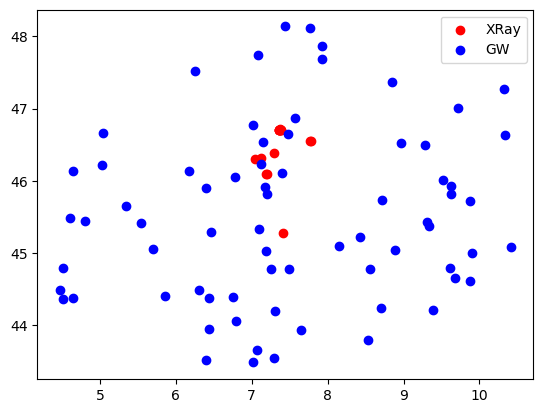

In [34]:
fig,ax=plt.subplots()
ax.scatter(df['RA'],df['Dec'],color='red',label='XRay')
ax.scatter(df2['RA'],df2['DEC'],color='blue',label='GW')
ax.legend()
plt.show()

In [35]:
cross=list(product(list(zip(df.RA, df.Dec)),list(zip(df2.RA, df2.DEC))))
matches=[]

for c in cross:
    
    angsep=dist(c[0][0],c[0][1],c[1][0],c[1][1])
    
    if angsep<1:
        matches.append(c)

In [36]:
full_matches=[]
k=list(objects.keys())
full_cross=list(product(list(zip([objects[key][0] for key in k], [objects[key][1] for key in k])),list(zip(df2.RA, df2.DEC))))

for c in full_cross:
    
    angsep=dist(c[0][0],c[0][1],c[1][0],c[1][1])
    
    if angsep<3:
        print(angsep)
        full_matches.append(c)

2.889597279314626


In [37]:
full_matches

[((7.18175, 45.03030555555556), (7.18283912503516, 45.0305331589576))]

In [38]:
np.where(df2['RA'].to_numpy()==7.18283912503516)

(array([5]),)

In [39]:
matches

[]